# Titanic Kaggle Predictions

# The main objective of this notebook is to explore the Titanic dataset from Kaggle and use machine learning to predict which passangers suvived the the Titanic shipwreck 

The dataset can be found on: 
https://www.kaggle.com/c/titanic/data

In [272]:
# Import libraries for data wrangling and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [273]:
# Import train and test data plus an example of what a submission should look like

train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
gender_submission = pd.read_csv('titanic/gender_submission.csv')

### Let's take a look at some rows of the dataset to see what kind of features we will be dealing with

In [274]:
# Let's take a look at the first 10 rows of the train dataset
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [275]:
# Let's take a look at the first 10 rows of the test dataset
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# Exploratory Data Analysis (EDA)

It looks like there is some missing data in the age and cabin columns.
Let's plot the data to see what values are missing.

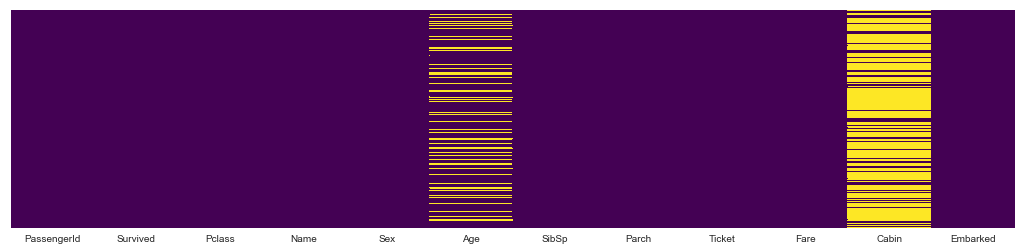

In [276]:
plt.figure(figsize=(18,4))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Indeed, a lot of data is missing, specially regarding the cabin of the passengers. Let's now calculate the actual number of missing values.

In [277]:
# Number of missing values per feature
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [278]:
print('Total number of rows in the dataset: ', len(train))

Total number of rows in the dataset:  891


In [279]:
# Percentage of missing values per feature
train.isnull().sum()/len(train)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Let's see the survival rate of the passengers

0    549
1    342
Name: Survived, dtype: int64


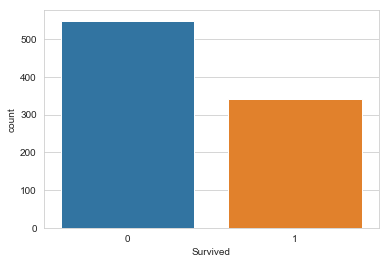

In [280]:
sns.countplot(x='Survived',data=train)
print(train['Survived'].value_counts())

### The binary classification target class is quite balanced, which is good news since the evaluation metric for this Kaggle competition is the accuracy (number of well classified predictions divided by the total number of predictions). In case of, for example, having detect a fraudulent transaction or a disease, and having an imbalanced dataset of, let's say 95% cases of no-fraud or no-disease, this could present a problem. Why? Because if our model always classifies the test data as no-fraud and no-disease, we would be getting a 95% of accuracy when it is actually not detecting any fraud nor disease. So, in other cases, with different data, other evaluations metrics such as precision, recall or F1-score, could be more useful.

0    549
1    342
Name: Survived, dtype: int64


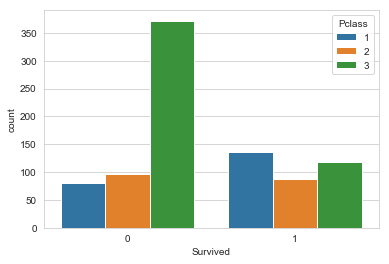

In [281]:
sns.countplot(x='Survived',data=train, hue='Pclass')
print(train['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


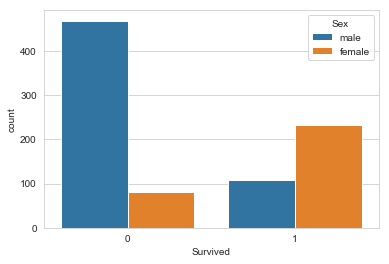

In [282]:
sns.countplot(x='Survived',data=train, hue='Sex')
print(train['Survived'].value_counts())

### Let's also take a look at the age distribution plot

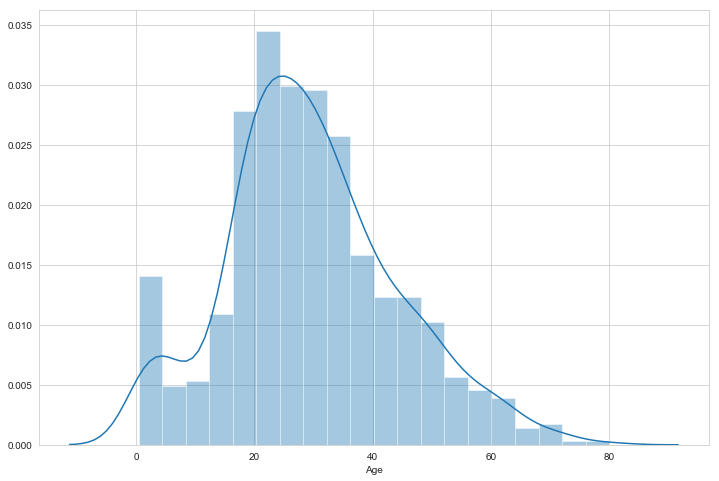

In [283]:
plt.figure(figsize=(12,8))
sns.distplot(train['Age'], bins=20)

# Data Cleaning

Let's fill in the missing data and drop features that we don't need.

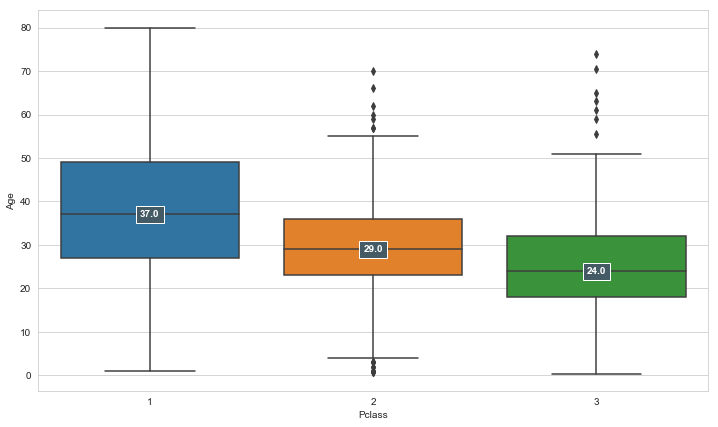

In [284]:
# Let's find the median age for each of the three different classes

plt.figure(figsize=(12, 7))
box_plot = sns.boxplot(x="Pclass",y="Age",data=train)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

In [285]:
def impute_age(cols):
    """
    This function fills the missing age values with the median value of the passenger class.
    """
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [286]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

### After applying the function to our dataset, let's check again the missing values

Number of missing values:  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


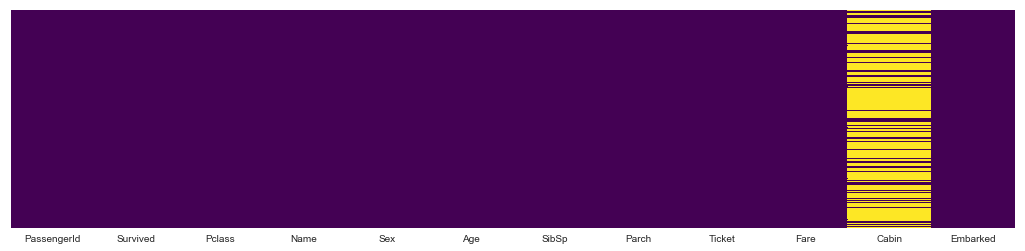

In [287]:
plt.figure(figsize=(18,4))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

print('Number of missing values: ', train.isnull().sum())

### Let's drop the cabin feature as well as the two missing values in the embarked column

In [288]:
train.drop('Cabin', axis=1, inplace=True)

In [289]:
train.dropna(inplace=True)

Number of missing values:  PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


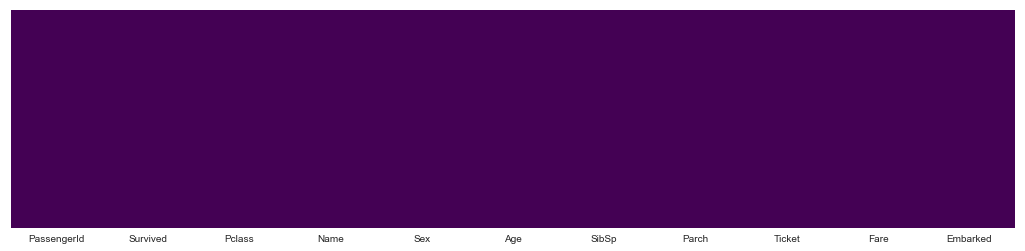

In [290]:
plt.figure(figsize=(18,4))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

print('Number of missing values: ', train.isnull().sum())

In [291]:
# Let's take a look again at the first 10 rows of the train dataset
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


# Categorical features

Now that the model has no missing values, let's convert the categorical features into binary vectors so that these can be fed into ML models.

In [292]:
# Data types present in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [293]:
# Let's start by looking into the names
print('Total number of unique names: ',train['Name'].nunique())

Total number of unique names:  889


In [294]:
print('Total number of unique Passenger ID: ', train['PassengerId'].nunique())

Total number of unique Passenger ID:  889


###  Doing some feature engineering here could be possible but, since the number of names is unique for every passenger, we are just going to keep it simple and drop this feature.

In [295]:
train.drop('Name', axis=1, inplace=True)

### Let's now check the tickets

In [296]:
train['Ticket'].nunique()

680

In [297]:
train['Ticket'].value_counts()

CA. 2343             7
347082               7
1601                 7
3101295              6
347088               6
CA 2144              6
382652               5
S.O.C. 14879         5
4133                 4
W./C. 6608           4
17421                4
2666                 4
113760               4
19950                4
349909               4
113781               4
LINE                 4
PC 17757             4
347077               4
SC/Paris 2123        3
PC 17755             3
PC 17582             3
35273                3
29106                3
110413               3
347742               3
C.A. 31921           3
110152               3
F.C.C. 13529         3
13502                3
                    ..
13509                1
220367               1
367228               1
367232               1
113501               1
345780               1
W./C. 14263          1
373450               1
W.E.P. 5734          1
Fa 265302            1
2690                 1
A/5 3540             1
349225     

### There are 680 different tickets and, at most, each ticket is shared between 7 people (could be a family with 7 members sharing the same ticket number?). In any case, there are so many different tickets, so let's just drop this column.

In [298]:
train.drop('Ticket', axis=1, inplace=True)

### Now let's deal with the Sex (male, female) and Embarked features (C = Cherbourg, Q = Queenstown, S = Southampton) with a one-hot encoding

In [299]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [300]:
embarked = pd.get_dummies(train['Embarked'], drop_first=True)

In [301]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [302]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [303]:
train.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [304]:
train = pd.concat([train, sex, embarked], axis=1)

In [305]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Now all the data has been cleaned and encoded!

# Building Machine Learning models

In [306]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [307]:
# Features and labels are separated
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

In [308]:
# Import MinMaxScaler to scale the data before feeding it into the ML models
from sklearn.preprocessing import MinMaxScaler

In [309]:
scaler = MinMaxScaler()

In [310]:
X_train = scaler.fit_transform(X_train)

# Logistic Regression

In [311]:
from sklearn.linear_model import LogisticRegression

In [312]:
# Fit the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Training accuracy score
log_reg_acc = log_reg.score(X_train, y_train)

# Accuracy score with a 10-fold cross validation
log_reg_cv_predict = cross_val_predict(log_reg, X_train, y_train, cv = 10)
log_reg_acc_cv = accuracy_score(y_train, log_reg_cv_predict)

print('Accuracy: ', log_reg_acc)
print('Accuracy with 10-fold cross validation: ', log_reg_acc_cv)

Accuracy:  0.797525309336
Accuracy with 10-fold cross validation:  0.796400449944


# K-Nearest Neighbors

In [313]:
from sklearn.neighbors import KNeighborsClassifier

In [314]:
# Fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Training accuracy score
knn_acc = knn.score(X_train, y_train)

# Accuracy score with a 10-fold cross validation
knn_cv_predict = cross_val_predict(knn, X_train, y_train, cv = 10)
knn_acc_cv = accuracy_score(y_train, knn_cv_predict)

print('Accuracy: ', knn_acc)
print('Accuracy with 10-fold cross validation: ', knn_acc_cv)

Accuracy:  0.841394825647
Accuracy with 10-fold cross validation:  0.785151856018


# Decision Tree Classifier

In [315]:
from sklearn.tree import DecisionTreeClassifier

In [316]:
# Fit the model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Training accuracy score
dtc_acc = dtc.score(X_train, y_train)

# Accuracy score with a 10-fold cross validation
dtc_cv_predict = cross_val_predict(dtc, X_train, y_train, cv = 10)
dtc_acc_cv = accuracy_score(y_train, dtc_cv_predict)

print('Accuracy: ', dtc_acc)
print('Accuracy with 10-fold cross validation: ', dtc_acc_cv)

Accuracy:  1.0
Accuracy with 10-fold cross validation:  0.7424071991


# Random Forest Classifier

In [317]:
from sklearn.ensemble import RandomForestClassifier

In [318]:
# Fit the model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Training accuracy score
rfc_acc = rfc.score(X_train, y_train)

# Accuracy score with a 10-fold cross validation
rfc_cv_predict = cross_val_predict(rfc, X_train, y_train, cv = 10)
rfc_acc_cv = accuracy_score(y_train, rfc_cv_predict)

print('Accuracy: ', rfc_acc)
print('Accuracy with 10-fold cross validation: ', rfc_acc_cv)

Accuracy:  1.0
Accuracy with 10-fold cross validation:  0.827896512936


# Support Vector Classifier

In [319]:
from sklearn.svm import SVC

In [320]:
# Fit the model
svc = SVC()
svc.fit(X_train, y_train)

# Training accuracy score
svc_acc = svc.score(X_train, y_train)

# Accuracy score with a 10-fold cross validation
svc_cv_predict = cross_val_predict(svc, X_train, y_train, cv = 10)
svc_acc_cv = accuracy_score(y_train, svc_cv_predict)

print('Accuracy: ', svc_acc)
print('Accuracy with 10-fold cross validation: ', svc_acc_cv)

Accuracy:  0.813273340832
Accuracy with 10-fold cross validation:  0.81214848144


# Gaussian Naive Bayes

In [321]:
from sklearn.naive_bayes import GaussianNB

In [322]:
# Fit the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Training accuracy score
gnb_acc = gnb.score(X_train, y_train)

# Accuracy score with a 10-fold cross validation
gnb_cv_predict = cross_val_predict(gnb, X_train, y_train, cv = 10)
gnb_acc_cv = accuracy_score(y_train, gnb_cv_predict)

print('Accuracy: ', gnb_acc)
print('Accuracy with 10-fold cross validation: ', gnb_acc_cv)

Accuracy:  0.788526434196
Accuracy with 10-fold cross validation:  0.782902137233


# Stochastic Gradient Descent

In [323]:
from sklearn.linear_model import SGDClassifier

In [324]:
# Fit the model
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

# Training accuracy score
sgd_acc = sgd.score(X_train, y_train)

# Accuracy score with a 10-fold cross validation
sgd_cv_predict = cross_val_predict(sgd, X_train, y_train, cv = 10)
sgd_acc_cv = accuracy_score(y_train, sgd_cv_predict)

print('Accuracy: ', sgd_acc)
print('Accuracy with 10-fold cross validation: ', sgd_acc_cv)

Accuracy:  0.793025871766
Accuracy with 10-fold cross validation:  0.775028121485


# Gradient Boosting Classifier

In [325]:
from sklearn.ensemble import GradientBoostingClassifier

In [326]:
# Fit the model
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Training accuracy score
gbc_acc = gbc.score(X_train, y_train)

# Accuracy score with a 10-fold cross validation
gbc_cv_predict = cross_val_predict(gbc, X_train, y_train, cv = 10)
gbc_acc_cv = accuracy_score(y_train, gbc_cv_predict)

print('Accuracy: ', gbc_acc)
print('Accuracy with 10-fold cross validation: ', gbc_acc_cv)

Accuracy:  0.897637795276
Accuracy with 10-fold cross validation:  0.806524184477


## It seems that among all these different algorithms, the random forest classifier obtains the highest cross validation score. Let's use this algorithm to make some predictions on the test dataset!

First we will need to clean the test dataset as it has been done with the train dataset.

In [327]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [328]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [329]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [330]:
test.drop('Cabin', axis=1, inplace=True)

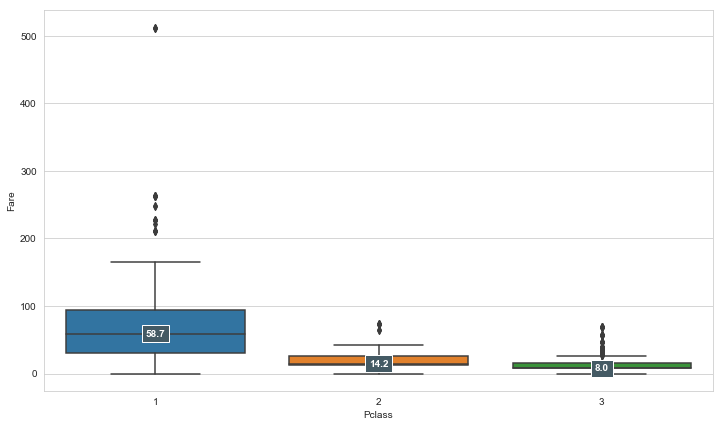

In [331]:
# Let's find the median fare for each of the three different classes

plt.figure(figsize=(12, 7))
box_plot = sns.boxplot(x="Pclass",y="Fare",data=train)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

In [332]:
# Let's define a function that imputes the missing fare values based on the median of the fares of each class

def impute_fare(cols):
    """
    This function fills the missing age values with the median value of the passenger class.
    """
    Fare = cols[0]
    Pclass = cols[1]
    if pd.isnull(Fare):
        if Pclass == 1:
            return 58.7
        elif Pclass == 2:
            return 14.2
        else:
            return 8
    else:
        return Fare

In [333]:
test['Fare'] = test[['Fare','Pclass']].apply(impute_fare,axis=1)

In [334]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [335]:
test.dropna(axis=1, inplace=True)

In [336]:
test.drop('Name', axis=1, inplace=True)

In [337]:
test.drop('Ticket', axis=1, inplace=True)

In [338]:
sex = pd.get_dummies(test['Sex'], drop_first=True)

In [339]:
embarked = pd.get_dummies(test['Embarked'], drop_first=True)

In [340]:
test.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [341]:
test = pd.concat([test, sex, embarked], axis=1)

In [342]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [344]:
# We transform the data only. Using fit_transform would cause data leakage.
X_test = scaler.transform(test)

### Now we predict the survival of the passengers in the test dataset

In [345]:
predictions_submission = rfc.predict(X_test)

In [346]:
predictions_submission

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [347]:
predictions_submission_df = pd.DataFrame()

In [348]:
predictions_submission_df['PassengerId'] = test['PassengerId']

In [349]:
predictions_submission_df['Survived'] = predictions_submission

In [350]:
predictions_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [352]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [359]:
len(predictions_submission_df) == len(gender_submission)

True

In [360]:
assert len(predictions_submission_df) == len(gender_submission)

### Our predictions dataframe looks like the example from Kaggle regarding format.

Let's save it as a csv file and submit it!

In [362]:
predictions_submission_df.to_csv('titanic/rfc_submission_titanic.csv', index=False)

# Done!